In [2]:
import pandas as pd

In [6]:
x=7000
feat_imp_df = pd.read_csv("/Users/varadakhot/Library/CloudStorage/OneDrive-Friedrich-Schiller-UniversitätJena/MCP_struct/RF_models_automation/RF_results/raw/cluster_0_1_mixed_MSTA_aa_plus_ec6098re_Feature_importance.tsv", sep='\t', usecols=[0,2],names=['col_name','feature_importance_vals'],header=0) 
print(feat_imp_df.shape)
top_50_ft_df = feat_imp_df.head(n=x)
top_50_ft_df

(6851, 2)


,col_name,feature_importance_vals
0,435_W,0.010456
1,330_K,0.009997
2,80_P,0.009928
3,80_S,0.009723
4,324_Q,0.009069
...,...,...
6846,397_K,0.000000
6847,58_L,0.000000
6848,266_H,0.000000
6849,265_W,0.000000


In [7]:
df_data = pd.read_csv("/Users/varadakhot/Library/CloudStorage/OneDrive-Friedrich-Schiller-UniversitätJena/MCP_struct/RF_models_automation/RF_results/raw/cluster_0_1_mixed_MSTA_aa_plus_ec6098re_data_df.tsv", sep='\t')
print(df_data)
df_data.drop_duplicates('protein',inplace=True)

                                                protein  0_D  0_E  0_F  0_G  \
0     IMGVR_UViG_3300027969_000035|3300027969|Ga0209...    0    0    0    0   
1     IMGVR_UViG_3300027969_000036|3300027969|Ga0209...    0    0    0    0   
2     IMGVR_UViG_3300027973_000026|3300027973|Ga0209...    0    0    0    0   
3     IMGVR_UViG_3300027974_000782|3300027974|Ga0209...    0    0    0    0   
4     IMGVR_UViG_3300028553_000004|3300028553|Ga0247...    0    0    0    0   
...                                                 ...  ...  ...  ...  ...   
1246                                   MGYP001269301632    0    0    0    0   
1247                                   MGYP001445468529    0    0    0    0   
1248                                   MGYP000515316755    0    0    0    0   
1249                                   MGYP003325855982    0    0    0    0   
1250                                   MGYP003333944615    0    0    0    0   

      0_L  0_M  0_P  0_Q  0_T  ...  565_F  565_I  5

In [8]:
df_biome = df_data[["protein","ecosystem_subtype"]]
# df_biome.to_csv("comb_cluster_biome.tsv", sep='\t', index=False)
df_biome_num = pd.get_dummies(df_biome.set_index("protein"), dtype=int)
print(df_biome_num)

df_data_filtered = df_data[["protein"] + [col for col in top_50_ft_df['col_name'] if col in df_data.columns]]
df_data_filtered_merged = df_biome_num[['ecosystem_subtype_Oceanic']].join(df_data_filtered.set_index("protein"),how="left")
df_data_filtered_merged.reset_index(inplace=True)
print(df_data_filtered_merged)

df_data_filtered_merged.to_csv("phyloglm_test_data_new_alignment.tsv", sep='\t', index=False)


                                                    ecosystem_subtype_Lake  \
protein                                                                      
IMGVR_UViG_3300027969_000035|3300027969|Ga02091...                       1   
IMGVR_UViG_3300027969_000036|3300027969|Ga02091...                       1   
IMGVR_UViG_3300027973_000026|3300027973|Ga02092...                       1   
IMGVR_UViG_3300027974_000782|3300027974|Ga02092...                       1   
IMGVR_UViG_3300028553_000004|3300028553|Ga02478...                       1   
...                                                                    ...   
MGYP001269301632                                                         0   
MGYP001445468529                                                         0   
MGYP000515316755                                                         1   
MGYP003325855982                                                         0   
MGYP003333944615                                                

In [10]:
df_phylo_res = pd.read_csv("/Users/varadakhot/Library/CloudStorage/OneDrive-Friedrich-Schiller-UniversitätJena/MCP_struct/Microviridae_analysis/multiple_cluster_analysis/combined_model_phyloglm/phyloglm_results_combined_model_pruned_full_new.csv",index_col=0).set_index("feature")

df_phylo_res

,Estimate,SE,z.value,p.value,alpha,padj
feature,,,,,,
435_W,-3.139176,0.494326,-6.350420,2.147274e-10,0.559351,1.663444e-08
330_K,-2.588086,0.476886,-5.427056,5.729117e-08,0.521602,2.219109e-06
80_P,NaN,NaN,NaN,NaN,NaN,NaN
80_S,4.451964,1.220548,3.647513,2.647912e-04,0.230644,2.729167e-03
324_Q,-2.301889,0.501361,-4.591284,4.405279e-06,0.576690,1.002775e-04
...,...,...,...,...,...,...
397_K,NaN,NaN,NaN,NaN,NaN,NaN
58_L,NaN,NaN,NaN,NaN,NaN,NaN
266_H,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_phylo_res_filt = df_phylo_res.reset_index()
# df_phylo_res_filt['abs_estimate'] = abs(df_phylo_res_filt['Estimate'])
# df_phylo_res_filt = df_phylo_res_filt.loc[df_phylo_res_filt['z.value'] > 0]     # change to get positive or negative zvalues for oceanic/lake respectively

df_phylo_res_filt['abs_z.value'] = abs(df_phylo_res_filt['z.value'])
df_phylo_res_filt = df_phylo_res_filt.loc[df_phylo_res_filt['padj'] <= 0.01]
df_phylo_res_filt
df_phylo_res_filt = df_phylo_res_filt[['feature', 'abs_z.value']]
df_phylo_res_filt.sort_values('abs_z.value',ascending=False,inplace=True)

df_phylo_res_filt.fillna(0,inplace=True)
df_phylo_res_filt['fake_shap'] = 0
df_phylo_res_filt['cluster_num'] = 'cluster_phyloglm_zvalue_new_01'

df_phylo_res_filt.rename(columns={'feature':'index',
                                  'abs_z.value' : 'gini_imp'},inplace=True)
df_phylo_res_filt = df_phylo_res_filt[['index','fake_shap','gini_imp','cluster_num']]
print(df_phylo_res_filt)
df_phylo_res_filt.to_csv("../../../RF_models_automation/RF_results/raw/cluster_phyloglm_zvalue_new_01_overall_model_Feature_importance.tsv",index=False,sep='\t')

      index  fake_shap  gini_imp                     cluster_num
218   524_T          0  9.192288  cluster_phyloglm_zvalue_new_01
158   555_M          0  8.970858  cluster_phyloglm_zvalue_new_01
356   522_Q          0  8.940765  cluster_phyloglm_zvalue_new_01
167    18_A          0  8.855942  cluster_phyloglm_zvalue_new_01
118   537_Q          0  8.847490  cluster_phyloglm_zvalue_new_01
...     ...        ...       ...                             ...
612   371_R          0  3.215202  cluster_phyloglm_zvalue_new_01
1993   10_N          0  3.214805  cluster_phyloglm_zvalue_new_01
1004  122_A          0  3.213231  cluster_phyloglm_zvalue_new_01
440   107_N          0  3.206090  cluster_phyloglm_zvalue_new_01
698    22_H          0  3.204014  cluster_phyloglm_zvalue_new_01

[654 rows x 4 columns]


In [13]:
feat_imp_df_2 = feat_imp_df.reset_index(names=['imp_order'])

df_merged = df_phylo_res.join(feat_imp_df_2.set_index("col_name"),how='left')
df_merged['abs_z.value'] = abs(df_merged['z.value'])
df_merged['abs_Estimate'] = abs(df_merged['Estimate'])

df_merged.sort_values('abs_Estimate',ascending=False,inplace=True)
df_merged = df_merged.loc[df_merged['padj'] <= 0.01]
df_merged.head(n=30)
# df_merged.to_csv("phyloglm_merged_giniscores.tsv", sep='\t')


,Estimate,SE,z.value,p.value,alpha,padj,imp_order,feature_importance_vals,abs_z.value,abs_Estimate
feature,,,,,,,,,,
119_Q,-5.613649,1.052060,-5.335863,9.509139e-08,0.321062,3.512037e-06,133,0.001302,5.335863,5.613649
476_T,5.136716,1.216568,4.222302,2.418193e-05,0.255588,3.889653e-04,198,0.000806,4.222302,5.136716
120_Q,5.086640,1.210320,4.202723,2.637233e-05,0.249059,4.179151e-04,231,0.000686,4.202723,5.086640
555_Y,4.981095,1.210593,4.114590,3.878689e-05,0.245274,5.638156e-04,277,0.000580,4.114590,4.981095
33_D,4.853606,0.947299,5.123625,2.997166e-07,0.278958,9.859856e-06,94,0.002057,5.123625,4.853606
343_K,4.837114,1.229064,3.935608,8.298639e-05,0.246710,1.062890e-03,494,0.000320,3.935608,4.837114
348_G,4.837114,1.224953,3.948815,7.853897e-05,0.234908,1.016773e-03,290,0.000554,3.948815,4.837114
485_I,4.837114,1.214116,3.984064,6.774671e-05,0.243252,8.939216e-04,481,0.000326,3.984064,4.837114
22_M,4.641354,1.216040,3.816777,1.352060e-04,0.235552,1.576200e-03,1114,0.000145,3.816777,4.641354


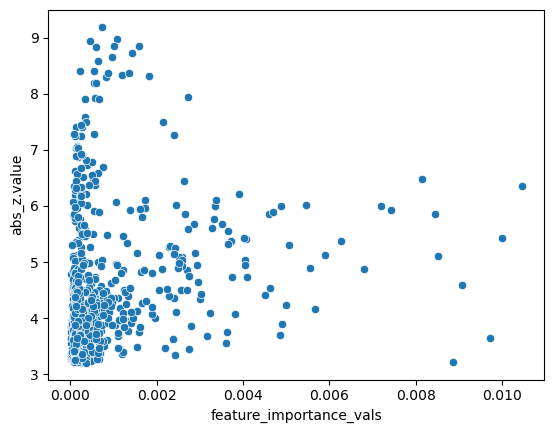

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(df_merged,x='feature_importance_vals', y='abs_z.value')
plt.show()